In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
import os
import matplotlib.pyplot as plt
import scipy.stats as st 
from scipy.stats import norm
import math

In [2]:
#Lagrangien 

def f(x,K,p,s,B):
    return np.exp(-p*(x**2)/K + (x**2)/2) + ((p*x)**2)/K + B*p + s

#Gradient Lagrangien 

def gradf(x,K,p,s,B):
    return -np.exp(-p*(x**2)/K + (x**2)/2)*(x**2)/K + 2*(p)*((x)**2)/K + B
    

In [3]:
#Algorithme de descente de gradient statégie de cauchy à pas fixe

def descente (x,K,p0,s,B,pas):
    iteration = 0
    p1 = p0 - pas*gradf(x,K,p0,s,B)
    while f(x,K,p1,s,B) < f(x,K,p0,s,B):
        p0 = p1
        iteration += 1
        p1 = p0 - pas*gradf(x,K,p0,s,B)
   
    return p0
    
    

In [4]:
K = 1
B = 0 #choix du B : comparable X1a pas trop grand, moyenne de la gaussienne on pénalise proportionnelement 
x = 3
pas = 0.001 
p0 = 0
s= 0
gradf(x,K,p0,s,B)


-810.1541817046963

In [5]:
descente (x,K,p0,s,B,pas)

0.50000000591117

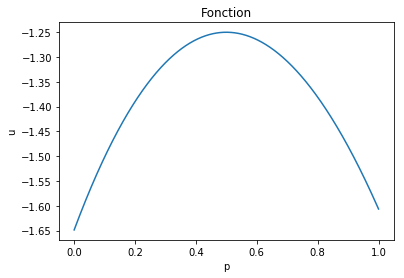

In [6]:
x = 1
p = np.linspace(0,1,1000)
plt.plot(p , -f(x,K,p,s,B))
xlabel('p')
ylabel('u')
title('Fonction')
show()

0.18507676493853129


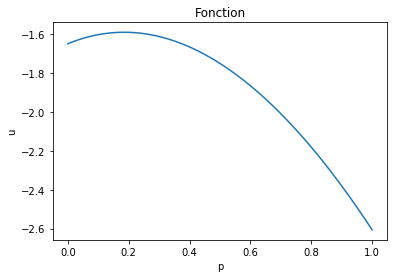

In [7]:
x = 1
B = 1
print(descente (x,K,p0,s,B,pas))
p = np.linspace(0,1,1000)
plt.plot(p , -f(x,K,p,s,B))
xlabel('p')
ylabel('u')
title('Fonction')
show()

0.4016655626888125


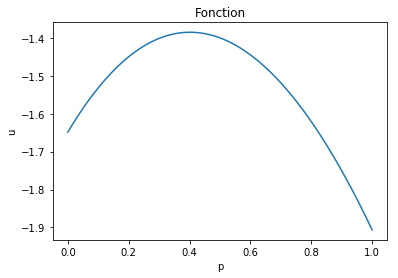

In [8]:
x = 1
B = 0.3
print(descente (x,K,p0,s,B,pas))
p = np.linspace(0,1,1000)
plt.plot(p , -f(x,K,p,s,B))
xlabel('p')
ylabel('u')
title('Fonction')
show()

 ## 2ème pénalité :

In [9]:
#fonction a à optimiser
def f2_a (a,s,gA,B,x0,p,k):
    return np.exp(-gA*(s-k*a**2/2))*(np.exp(gA*p)*(1-norm.cdf(B/x0+a,0,1))+norm.cdf(B/x0+a,0,1))

0.0

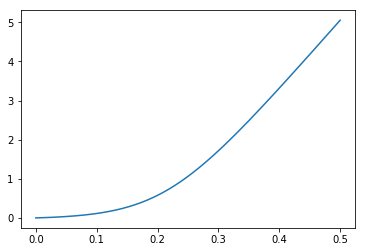

In [10]:
# on trace la fonction et on calcule le minimum
a2=np.linspace(0,0.5,1000)
s=0
gA=1
B=2
x0=1
p=np.linspace(0,10,1000)
k=1
y=np.zeros(len(a2))

y=f2_a(a2,s,gA,B,x0,p,k)
plt.plot(a2,np.log(y))
np.argmin(y)
a_star2=a2[np.argmin(y)]
a_star2

In [11]:
#fonction p à minimiser
def f2_p (a,s,gA,B,x0,p,k):
    return np.exp(-x0*a + x0**2/2)+ s - p *(1-norm.cdf(B/x0+a,0,1))

100.0

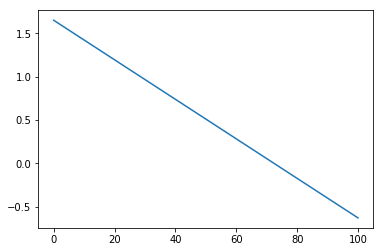

In [12]:
p2=np.linspace(0,100,1000)

y=np.zeros(len(p2))

y=f2_p(a_star2,s,gA,B,x0,p2,k)
plt.plot(p2,y) #np.log(y))
np.argmin(y)
p_star2=p2[np.argmin(y)]
p_star2

In [13]:
#fonction s à minimiser
def f2_s (a,s,gA,B,x0,p,k):
    return y + k*a**2/2 + (1/gA)*math.log( (1-norm.cdf(B/x0+a,0,1))*np.exp((gA*p)**2/2)+norm.cdf(B/x0+a,0,1))

0.0

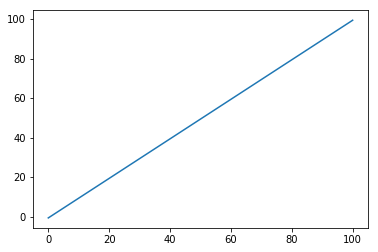

In [14]:
s2=np.linspace(0,100,1000)

y=np.zeros(len(s2))

y=f2_p(a_star2,s2,gA,B,x0,p_star2,k)
plt.plot(s2,y)
np.argmin(y)
s_star2=s2[np.argmin(y)]
s_star2

 ## 3ème pénalité :

In [15]:
#fonction a à optimiser
def f3_a (a,s,gA,B,x0,p,k):
    return np.exp(-gA*(s-k*a**2/2))*(norm.cdf(B/x0+a,0,1)+np.exp(-gA*p*x0*a+(gA*p*x0)**2/2)*(1-norm.cdf(B/x0+a,gA*p*x0,1)))

0.2852852852852853

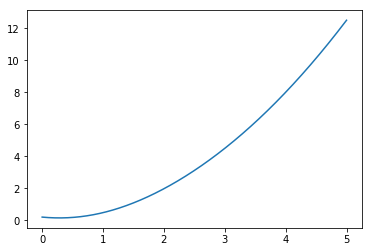

In [32]:
s=0
gA=1
B=0.5
x0=1
p=3
k=1



s=0
gA=1
B=-1
x0=1
p=0.5
k=1


a3=np.linspace(0,5,1000)

y=np.zeros(len(a3))
for i in range(0,len(a3)):
    y[i]=f3_a(a3[i],s,gA,B,x0,p,k)
plt.plot(a3,np.log(y))
np.argmin(y)
a_star3=a3[np.argmin(y)]
a_star3

In [17]:
#fonction p à optimiser
def f3_p (a,s,gA,B,x0,p,k):
    return np.exp(-x0*a + x0**2/2)+s+p*x0*a*(1-norm.cdf(B/x0+a,0,1))-p*x0*(1/np.sqrt(2*math.pi))*np.exp(-0.5*(B/x0+a)**2)

1.0

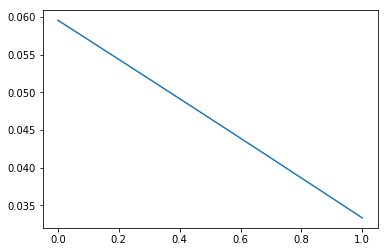

In [18]:
p3=np.linspace(0,1,1000)

y=np.zeros(len(p3))

for i in range(0,len(p3)):
    y[i]=f3_p(a_star3,s,gA,B,x0,p3[i],k)
plt.plot(p3,np.log(y))
np.argmin(y)
p_star3=p3[np.argmin(y)]
p_star3

In [19]:
#fonction s à optimiser
def f3_s (a,s,gA,B,x0,p,k,Y):
    return Y+k*a**2/2 - (1/gA)*math.log ( norm.cdf(B/x0+a,0,1) + (1- norm.cdf(B/x0+a-gA*p*x0,0,1))*np.exp(-gA*p*x0*a+(gA*p*x0)**2/2))

0.0

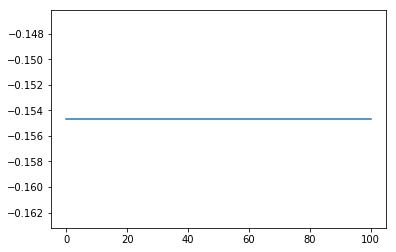

In [20]:
s3=np.linspace(0,100,1000)
Y=0
y=np.zeros(len(s3))
for i in range(0,len(s3)):
    y[i]=f3_s(a_star3,s3[i],gA,B,x0,p_star3,k,Y)
plt.plot(s3,y)
np.argmin(y)
s_star3=s3[np.argmin(y)]
s_star3

 ## 4ème pénalité :

In [21]:
#fonction a à optimiser
def f4_a (a,s,gA,B,x0,p,k):
    return np.exp(-gA*(s-k*a**2/2))*(exp(-gA*p*(x0*a+B-gA*p*x0**2/2))*(1-norm.cdf(B/x0+a-gA*p*x0,0,1))+norm.cdf(B/x0+a,0,1))

0.7707707707707707

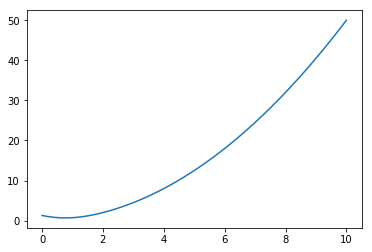

In [22]:
a4=np.linspace(0,10,1000)
s=0
gA=1
B=0.5
x0=2
p=0.9
k=1
y=np.zeros(len(a4))
for i in range(0,len(a4)):
    y[i]=f4_a(a4[i],s,gA,B,x0,p,k)
plt.plot(a4,np.log(y))
np.argmin(y)
a_star4=a4[np.argmin(y)]
a_star4

In [23]:
#fonction p à optimiser
def f4_p (a,s,gA,B,x0,p,k):
    return np.exp(-x0*a + x0**2/2)+s-p*(x0*(1/np.sqrt(2*math.pi))*np.exp(-0.5*(B/x0+a)**2) -(x0*a+B)*(1-norm.cdf(B/x0+a,0,1)))

1.0

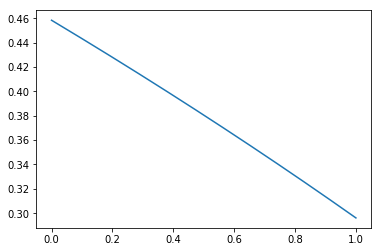

In [24]:
p4=np.linspace(0,1,1000)

y=np.zeros(len(p4))

for i in range(0,len(p4)):
    y[i]=f3_p(a_star4,s,gA,B,x0,p4[i],k)
plt.plot(p4,np.log(y))
np.argmin(y)
p_star4=p4[np.argmin(y)]
p_star4

In [25]:
#fonction s à optimiser
def f4_s (a,s,gA,B,x0,p,k,Y):
    return Y+k*a**2/2 + (1/gA)*math.log ( norm.cdf(B/x0+a,0,1) + (1- norm.cdf(B/x0+a-gA*p*x0,0,1))*np.exp(-gA*p*x0*a+(gA*p*x0)**2/2))

0.0

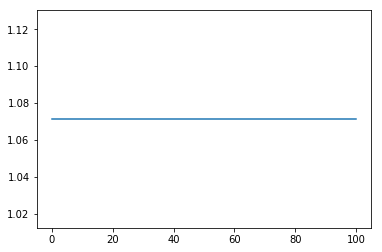

In [26]:
s4=np.linspace(0,100,1000)
Y=0
y=np.zeros(len(s4))
for i in range(0,len(s4)):
    y[i]=f4_s(a_star4,s4[i],gA,B,x0,p_star4,k,Y)
plt.plot(s4,y)
np.argmin(y)
s_star4=s4[np.argmin(y)]
s_star4

1ere pénalité : 

f -> a*(p) -> f(p,a*) 

avec p un linspace  (p* = argmin f(p,a*)

for p in linspace
    for a in linspace
        a*(p) = inf (a,p)   #on stocke ces a*
        
        p* = inf fonction(p, a*(p) )

In [27]:
s=0
gA=1
B=0.5
x0=1

In [28]:
#1ère pénalité : 


a_star = []


taille = 100
p = np.linspace(0,1,taille)

for i in (p):
    a = np.linspace(0,10,1000)
    y=f1_a(a,s,gA,B,x0,i,k) 
    a_star.append(a[np.argmin(y)])
    
p_star_star = []
for i in range(taille):
    y=f1_p(a_star[i],s,gA,B,x0,p[i],k)                                               
    p_star_star.append(y)                                          

p_star = np.min(p_star_star)
                                         
print(p_star)
print(p[np.argmin(p_star_star)])
plt.plot(p,p_star_star)

NameError: name 'f1_a' is not defined

In [ ]:
#2ème pénalité : 


a_star = []


taille = 100
p = np.linspace(0,1,taille)

for i in (p):
    a = np.linspace(0,10,1000)
    y=f2_a(a,s,gA,B,x0,i,k) 
    a_star.append(a[np.argmin(y)])
    
p_star_star = []
for i in range(taille):
    y=f2_p(a_star[i],s,gA,B,x0,p[i],k)                                               
    p_star_star.append(y)                                          

p_star = np.min(p_star_star)
                                         
print(p_star)
print(p[np.argmin(p_star_star)])
plt.plot(p,p_star_star)

0.9672625686782823
1.0


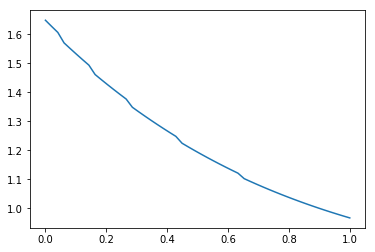

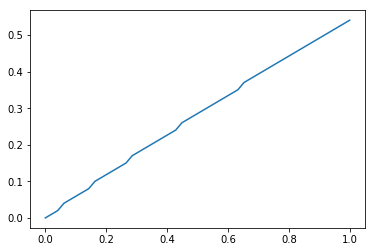

In [39]:
#3ème pénalité : 


a_star = []


taille = 50
p = np.linspace(0,1,taille)

for i in (p):
    a = np.linspace(0,10,1000)
    y=f3_a(a,s,gA,B,x0,i,k) 
    a_star.append(a[np.argmin(y)])
    
p_star_star = []
for i in range(taille):
    y=f3_p(a_star[i],s,gA,B,x0,p[i],k)                                               
    p_star_star.append(y)                                          

p_star = np.min(p_star_star)
                                         
print(p_star)
print(p[np.argmin(p_star_star)])
plt.plot(p,p_star_star)
plt.show()
plt.plot(p , a_star)
plt.show()

Commentaire à ajouter pour justifier (pour deuxième graphe): la fonction f3_a est bien croissante
(prendre la dérivée et montrer qu'elle est > 0 ) donc f3_a (a, p1 ) > f3_a (a, p2)   , avec p1>p2 

-0.0278788494496785
2.0202020202020203


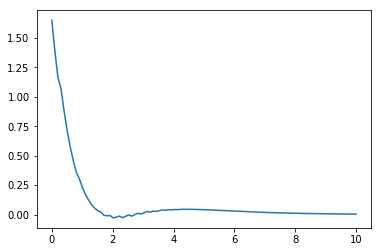

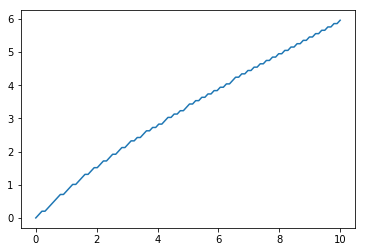

In [52]:
#4ème pénalité : 


a_star = []


taille = 100
p = np.linspace(0,10,taille)

for i in (p):
    a = np.linspace(0,10,taille)
    y=f4_a(a,s,gA,B,x0,i,k) 
    a_star.append(a[np.argmin(y)])
    
p_star_star = []
for i in range(taille):
    y=f4_p(a_star[i],s,gA,B,x0,p[i],k)                                               
    p_star_star.append(y)                                          

p_star = np.min(p_star_star)
                                         
print(p_star)
print(p[np.argmin(p_star_star)])
plt.plot(p,p_star_star)
plt.show()
plt.plot(p , a_star)
plt.show()